In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df  = pd.read_csv('Dataset .csv')
#df

In [22]:
data = df.dropna()

In [23]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [24]:
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [29]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

sia = SentimentIntensityAnalyzer()
pre = lambda t: [w for w in word_tokenize(t.lower().translate(str.maketrans("","",string.punctuation))) if w not in stopwords.words('english')]
pos , neg =[], []

for t in data['Rating text'].astype(str):
    tokens = pre(t)
    score = sia.polarity_scores(t)['compound']
    (pos if score >= 0.05 else neg).extend(tokens)

pos_wc, neg_wc = pd.Series(pos).value_counts(), pd.Series(neg).value_counts()

print('Most common positive keywords:')
print(pos_wc.head(10))
print('Most common negative keywords:')
print(neg_wc.head(10))



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Most common positive keywords:
good         3174
excellent     300
Name: count, dtype: int64
Most common negative keywords:
average    3734
rated      2148
poor        186
Name: count, dtype: int64


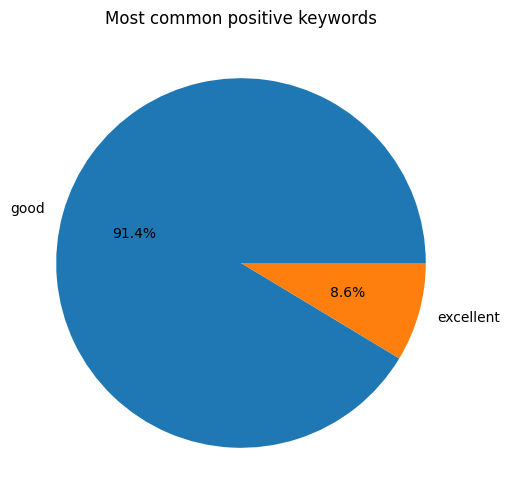

In [31]:
plt.figure(figsize=(6,6))
plt.pie(pos_wc.head(10),labels=pos_wc.head(10).index,autopct='%1.1f%%')
plt.title('Most common positive keywords')
plt.show()

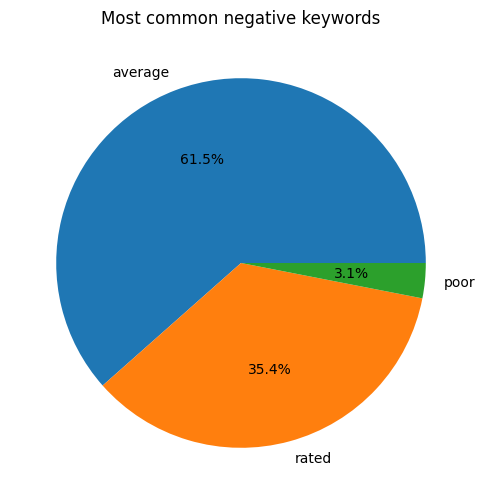

In [32]:
plt.figure(figsize=(6,6))
plt.pie(neg_wc.head(10),labels=neg_wc.head(10).index,autopct='%1.1f%%')
plt.title('Most common negative keywords')
plt.show()

In [38]:
data['Review length'] = data['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))
avg_length = data['Review length'].mean()
print('Average Review Length :',avg_length)
print('Relationship betweenreview length and rating :')
print(data.groupby('Aggregate rating')['Review length'].mean())

Average Review Length : 1.3380842590651856
Relationship betweenreview length and rating :
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review length, dtype: float64


C:\Users\kaush\AppData\Local\Temp\ipykernel_11144\2768732671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review length'] = data['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))


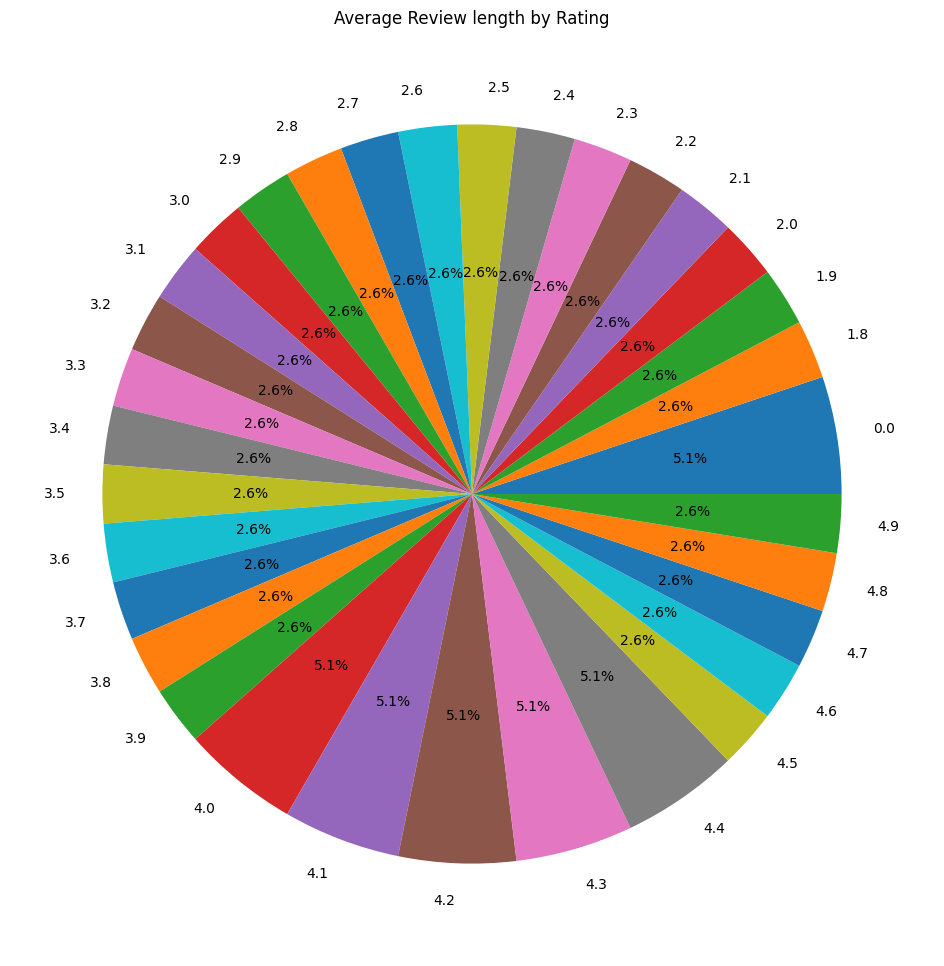

In [41]:
ratingVSlength = data.groupby('Aggregate rating')['Review length'].mean()

plt.figure(figsize=(12,12))
plt.pie(ratingVSlength,labels=ratingVSlength.index,autopct='%1.1f%%')
plt.title('Average Review length by Rating')
plt.show()